# Singular Value Decomposition of an Image (adapted from https://www.frankcleary.com/)

# Introducción

La descomposición en valores singulares tiene aplicaciones en la compresión de imágenes. Veamos como funciona con algunas herramientas para manipular imágenes en Python. La clave aquí es que una imagen en blanco y negro es simplemente una matriz donde los números representan la luminancia de un píxel dado, que puede ser descompuesta igual que cualquier otra.

In [2]:
# Importar las bibliotecas necesarias

import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image


Trabajaremos con esta imagen de la modelo sueca Lena Söderberg Forsen tomada por Anna Huix. 

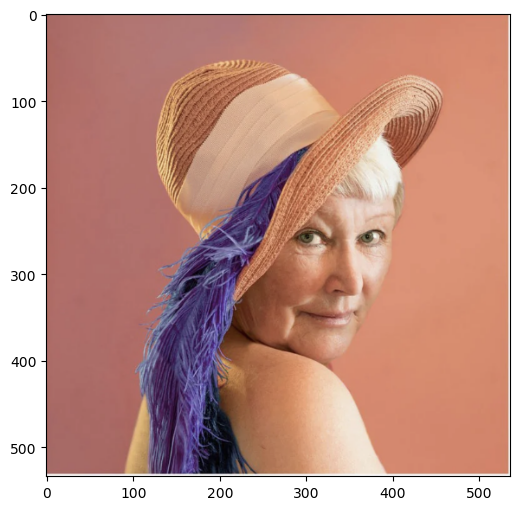

In [3]:
img = Image.open('Lena.jpg')
plt.figure(figsize=(9, 6))
plt.imshow(img);

En primer lugar la convertimos en escala de grises para simplicar el problema.

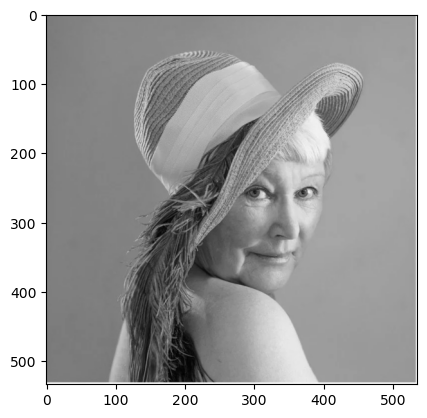

In [4]:
imggray = img.convert('LA')
plt.imshow(imggray);

Ahora, convertiremos la imagen en una matriz de numpy y ploteamos el resultado para mostrar que no hemos cambiado los datos en el proceso:

The dimensions of the matrix are
534 536


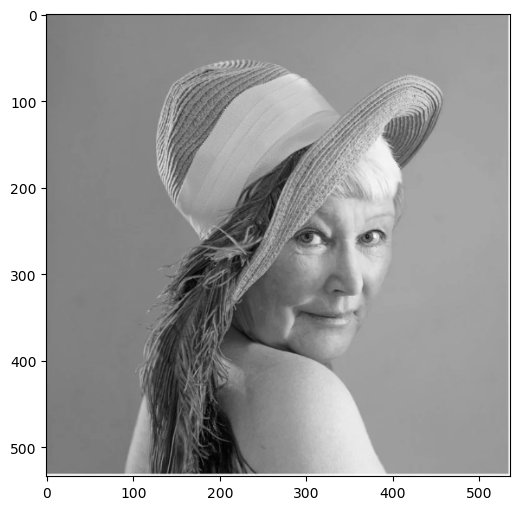

In [5]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print('The dimensions of the matrix are')
print(imggray.size[1], imggray.size[0])
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

Pero no deja de ser simplemente una matriz, cuyas entradas indican la luminancia (como de negro/blanco) de cada pixel. Veamos el valor de una entrada concreta:

In [6]:
print(imgmat[1,1])

111.0


Teniendo la imagen en forma de matriz, calculamos la descomposición SVD:

In [7]:
U, sigma, V = np.linalg.svd(imgmat)

Calcular una aproximación de la imagen utilizando la primera columna de U y la primera fila de V reproduce la característica más prominente de la imagen: la región de la imagen ocupada por el retrato

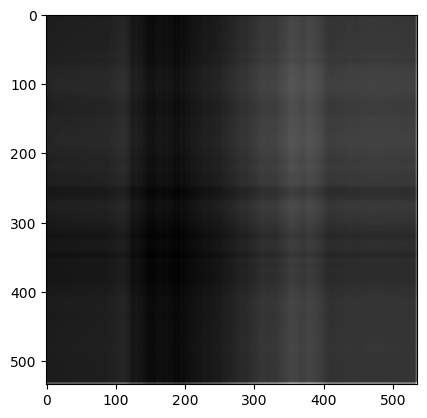

In [8]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

Solo añadiendo un par de modos más podemos empezar a intuir el rostro:

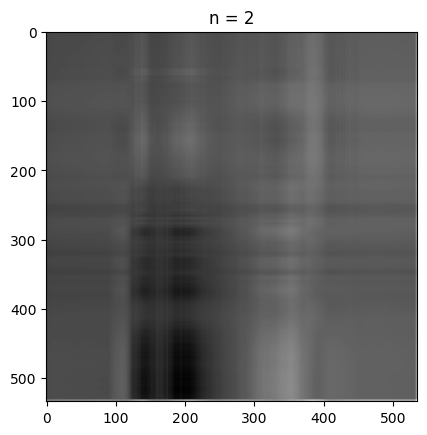

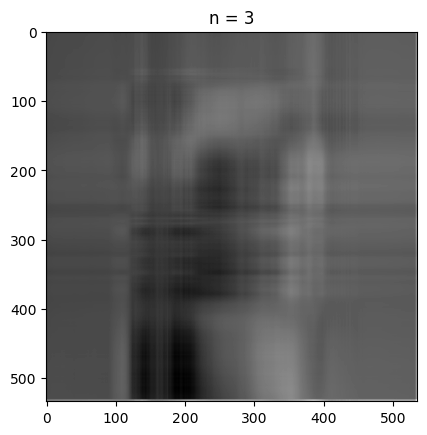

In [9]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

El bucle a continuación muestra la imagen reconstruida utilizando los primeros n vectores de la descomposición en valores singulares (n se muestra en el título del gráfico). Los primeros 50 vectores producen una imagen muy cercana a la imagen original, ocupando solo aproximadamente un 3.2% del espacio de los datos originales, calculado como (50x3900 + 50 + 50x2600) / (3900x2600).

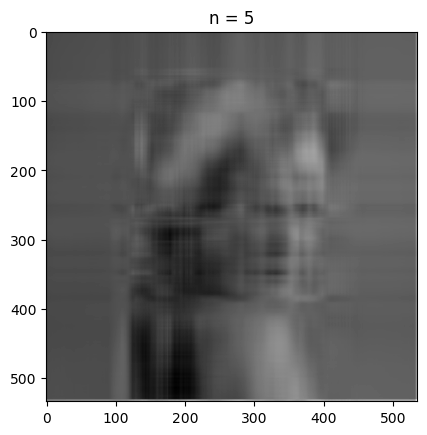

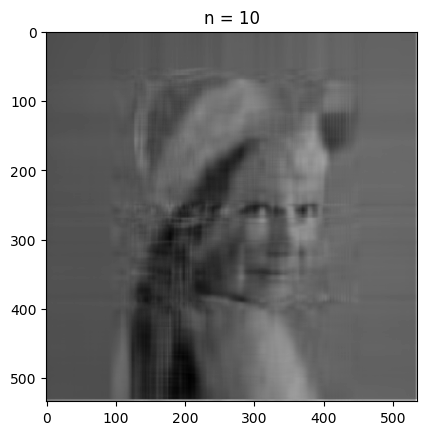

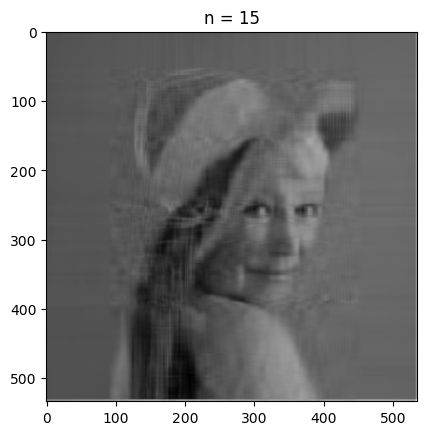

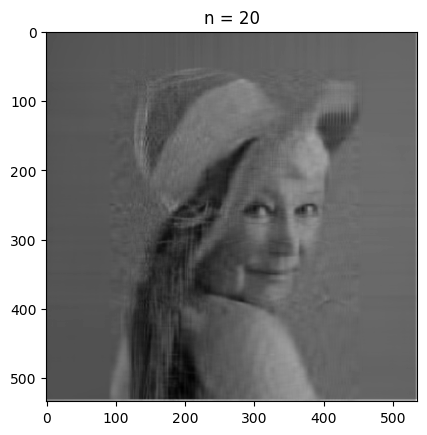

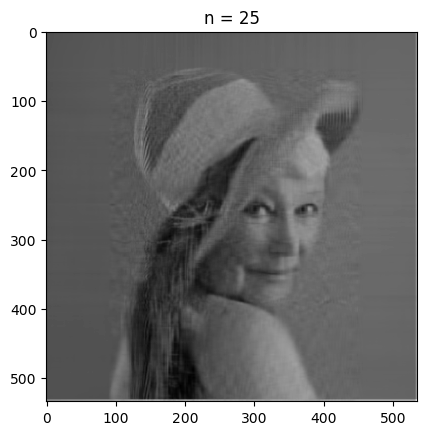

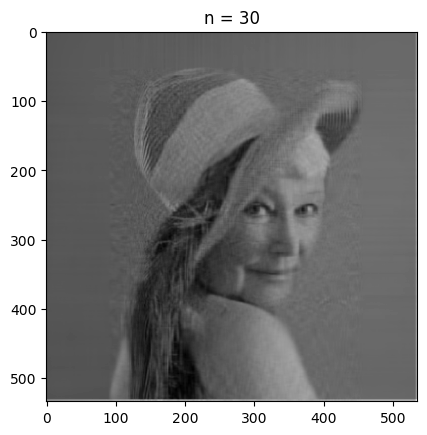

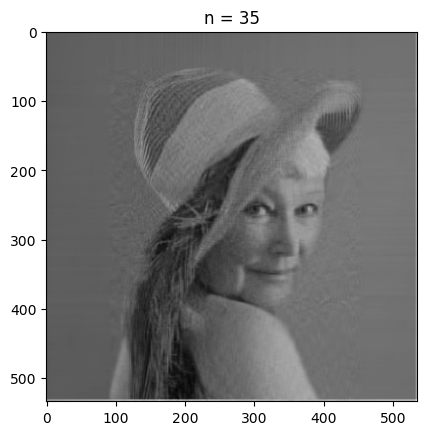

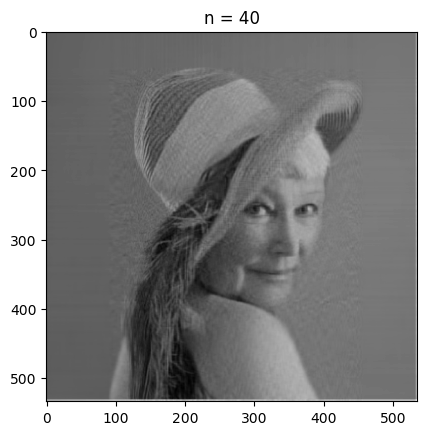

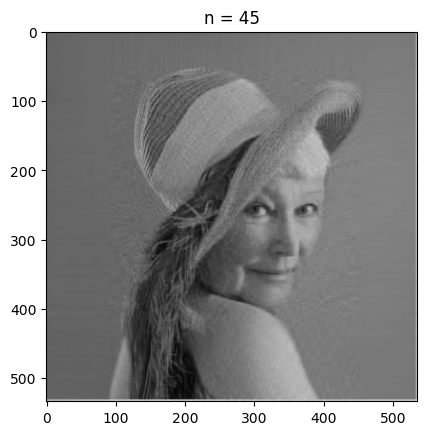

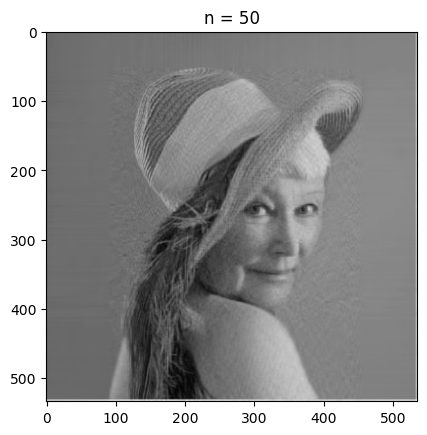

In [10]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

Por último, podemos utilizar el código de debajo para reconstruir con un número arbitratio de modos "i". Comprobad como la imagen se parece cada vez más y también como las entradas de la matriz son cada vez más parecidas (por ejemplo, con la entrada (1,1):

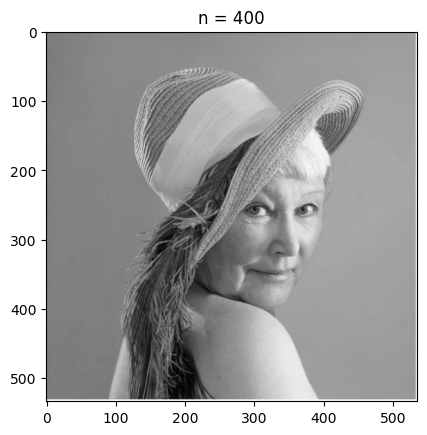

111.0
110.96903969255565


In [11]:

i=400
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstimg, cmap='gray')
title = "n = %s" % i
plt.title(title)
plt.show()

print(imgmat[1,1])
print(reconstimg[1,1])

# EJERCICIO 2:

Podemos obtener información sobre la importancia de los valores singulares viendo su tamaño. Representar de forma gráfica el decaimiento de los modos (valores singulares) de este problema. Para ello representar en $y$ la magnitud de los valores singulares (valores de la diagonal de sigma) y en $x$ su posición en la matriz. Se recomienda usar escala logarítmica en la coordenada $y$. 
Relacionar la calidad de la imagen recuperada con la magnitud del valor singular más pequeño usado. 
Por último, probab con distintas imágenes.